# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd
df = pd.read_csv("Traffic Data.csv", parse_dates=['date_time'], index_col='date_time')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>], dtype=object)

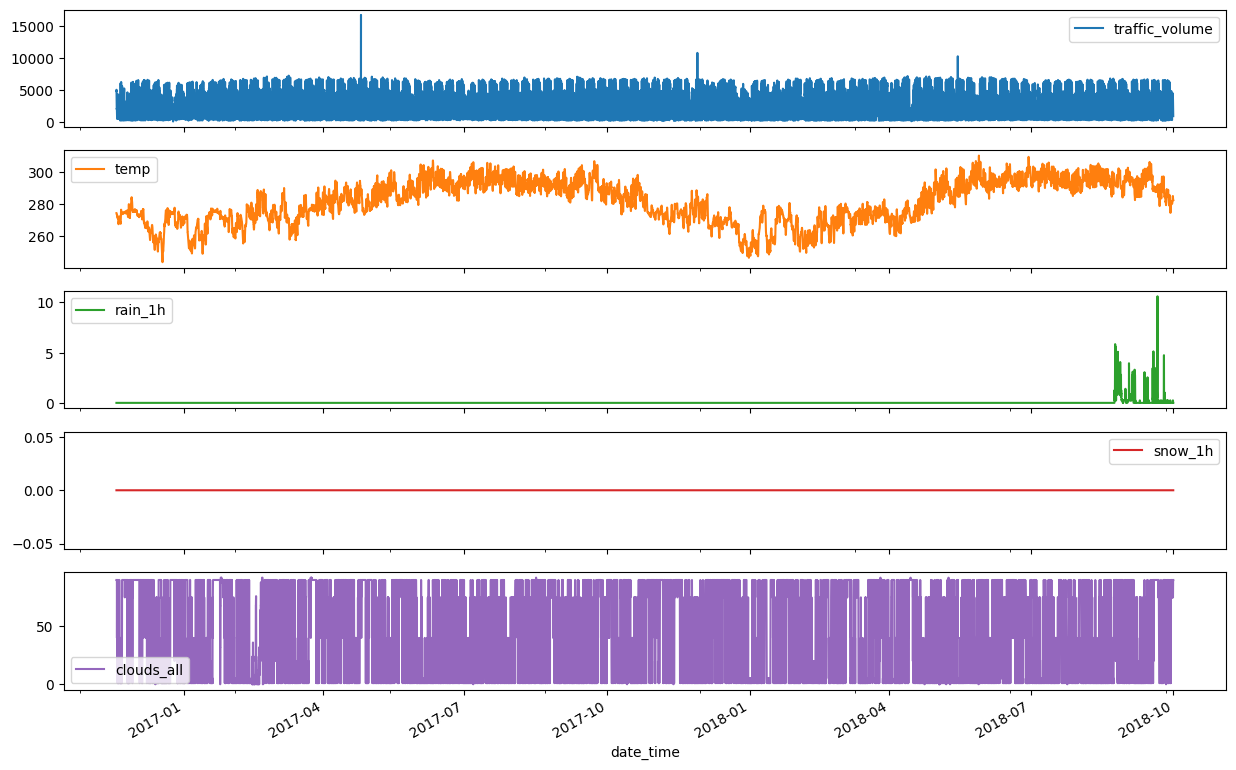

In [5]:
df.plot(subplots=True, figsize=(15,10))

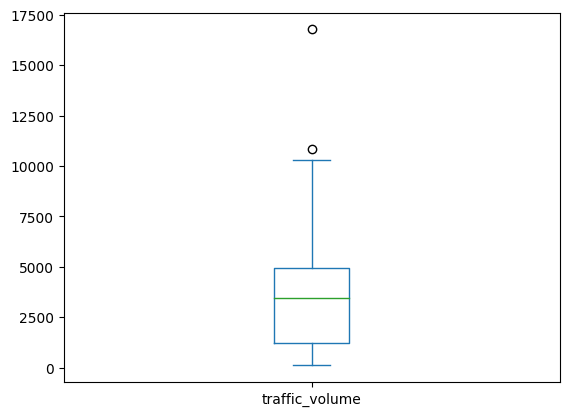

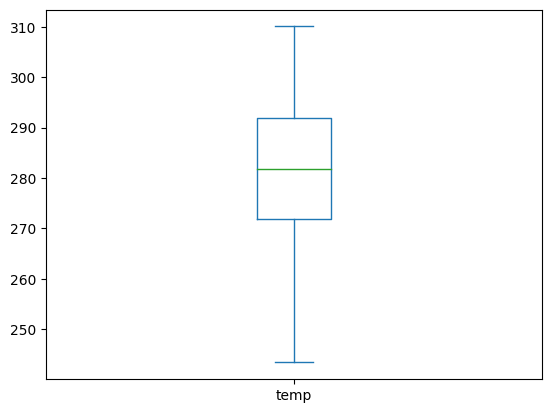

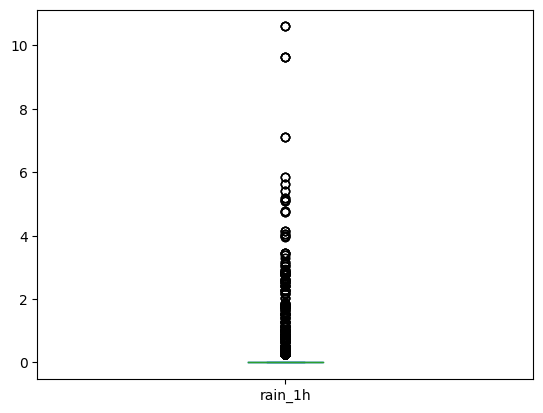

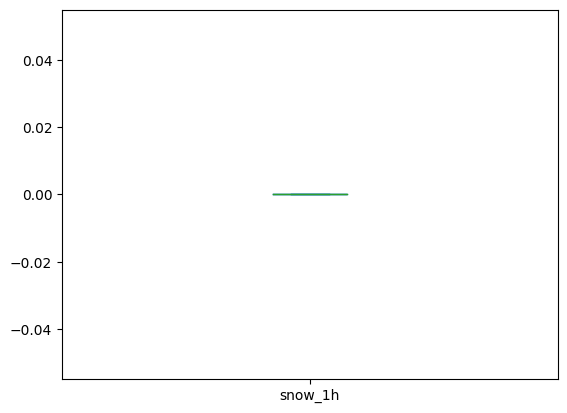

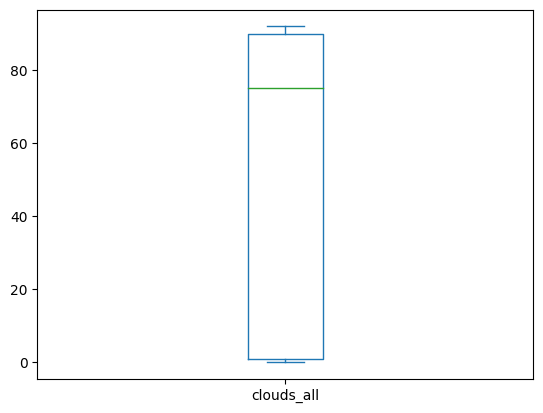

In [6]:
for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    df.plot.box(column=col)

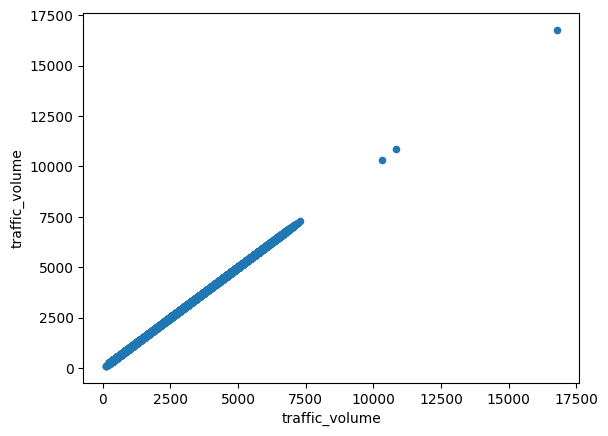

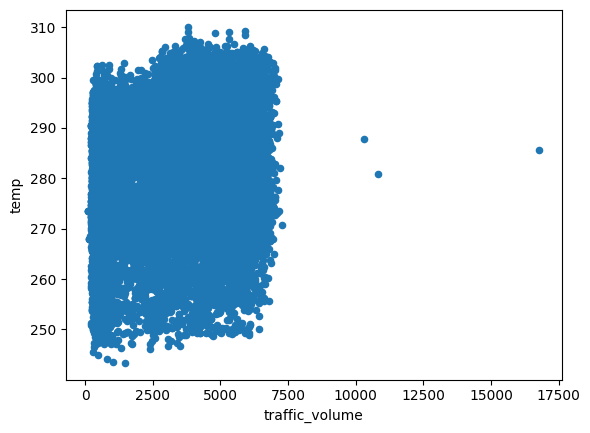

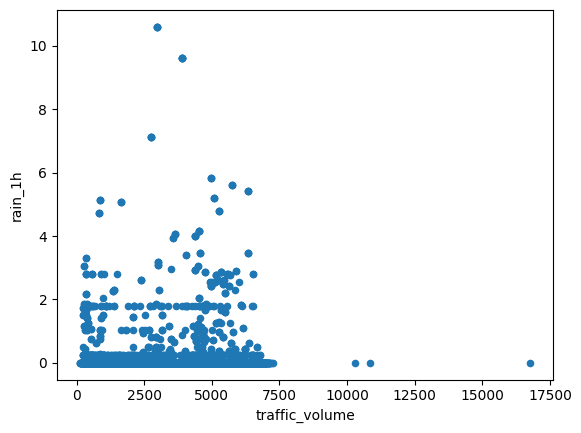

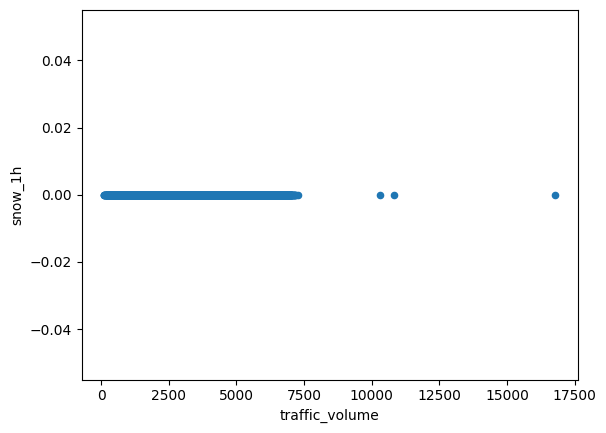

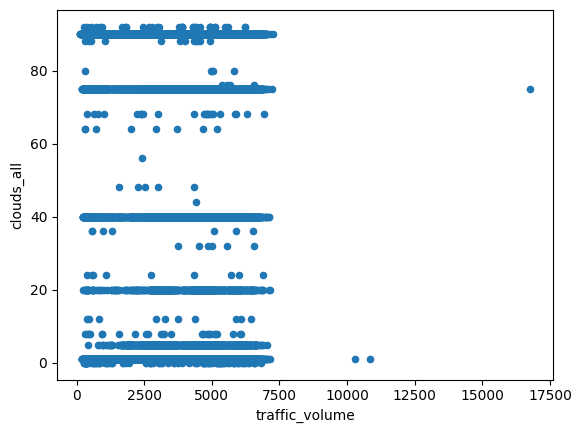

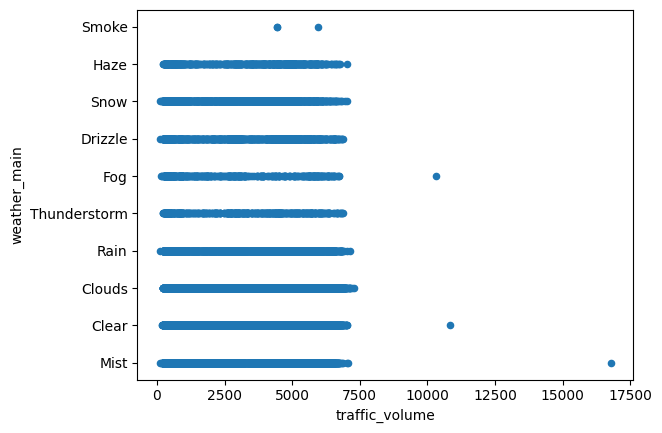

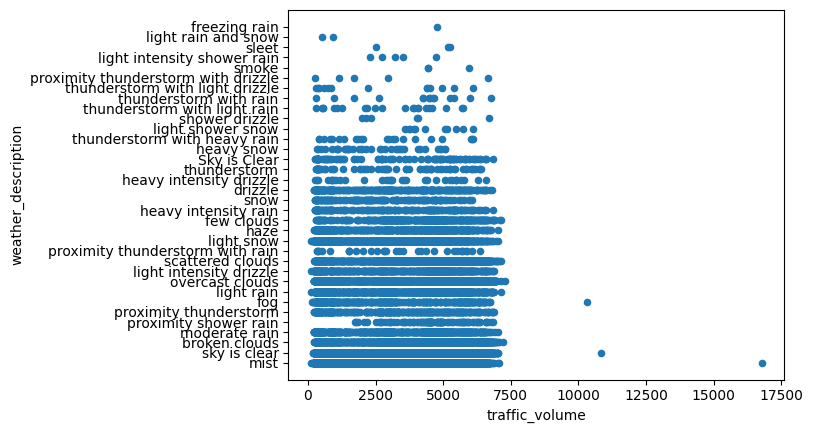

In [7]:
for col in df.columns:
  df.plot.scatter(x='traffic_volume',y=col)

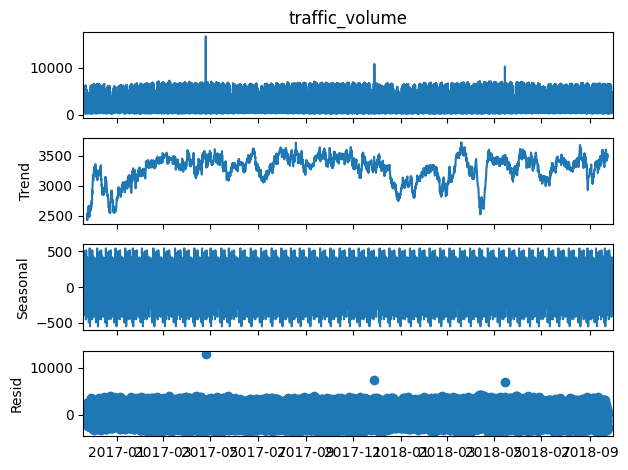

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
visual_test = df.copy()
visual_test.dropna(inplace=True)
result = seasonal_decompose(visual_test['traffic_volume'], model='additive', period=365).plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [9]:
for col in df.columns:
  print(df[col].name)
  print(df[col].unique())

traffic_volume
[1209. 1248. 4602. ... 6742. 1783. 1132.]
temp
[291.15 286.01 293.69 ... 249.88 269.23 289.06]
rain_1h
[ 0.    0.25  1.78  2.79  0.44  2.26  0.28  1.86  1.02  4.    0.89  9.62
  5.08  1.15  3.05  3.45  2.85  4.79  1.82  5.42  1.85  5.19  2.62  1.52
  0.85  0.38  0.76  1.27  2.54 10.6   0.51  2.86  0.34  2.29  1.01  2.03
  2.16  1.1   3.1   3.94  5.84  0.69  1.14  1.4   1.66  1.68  3.4   2.48
  0.93  1.06  4.15  2.2   2.41  2.76  0.86  0.8   1.6   0.42  0.71  4.06
  0.61  0.81  0.43  0.98  1.72  1.21  7.11  0.3   2.88  0.29  0.32  2.61
  1.3   5.12  0.63  1.45  5.62  0.35  0.64  3.18  2.92  2.6   2.96  4.74
  1.65  3.3   0.66]
snow_1h
[0.]
clouds_all
[90  1 75  5 40 20  0  8 88 68 92 44 48 32 12 36 80 24 64 76 56]
weather_main
['Mist' 'Clear' 'Clouds' 'Rain' 'Thunderstorm' 'Fog' 'Drizzle' 'Snow'
 'Haze' 'Smoke']
weather_description
['mist' 'sky is clear' 'broken clouds' 'moderate rain'
 'proximity shower rain' 'proximity thunderstorm' 'fog' 'light rain'
 'overcast clouds'

In [10]:
#Sorting
df.sort_values(by='date_time', inplace=True)

In [11]:
df.drop('weather_description', axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])

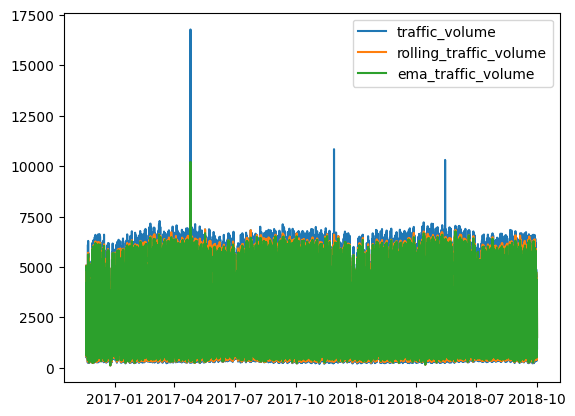

In [12]:
import matplotlib.pyplot as plt
df['rolling_traffic_volume'] = df['traffic_volume'].rolling(window=3).mean()
df['ema_traffic_volume'] = df['traffic_volume'].ewm(span=3, adjust=False).mean()
plt.plot(df['traffic_volume'], label='traffic_volume')
plt.plot(df['rolling_traffic_volume'], label='rolling_traffic_volume')
plt.plot(df['ema_traffic_volume'], label='ema_traffic_volume')
plt.legend()
plt.show()

** i will use EMA for the target rather than the target it self here

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [13]:
#i will encode the catecorical then i will impute with the iterative imputer after that i will do the feature engineering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])


In [14]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,rolling_traffic_volume,ema_traffic_volume
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,NaN,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,NaN,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,4872.000000,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4939.333333,4973.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,5006.666667,5023.5


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative = IterativeImputer(random_state=42)
df_imputer = iterative.fit_transform(df)
df_imputer = pd.DataFrame(df_imputer, columns=df.columns, index= df.index)

In [16]:
df_imputer.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
rolling_traffic_volume,0
ema_traffic_volume,0


In [17]:
#Feature shift, diff, and date
df_imputer['prev_traffic_volume'] = df_imputer['traffic_volume'].shift(1)
df_imputer['prev_traffic_volume'].fillna(0, inplace=True)
df_imputer['diff_traffic_volume'] = df_imputer['traffic_volume'].diff()
df_imputer['diff_traffic_volume'].fillna(0, inplace=True)
df_imputer['day_of_the_week'] = df_imputer.index.dayofweek
df_imputer['month'] = df_imputer.index.month
df_imputer['day_of_the_year'] = df_imputer.index.dayofyear


df_imputer.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,rolling_traffic_volume,ema_traffic_volume,prev_traffic_volume,diff_traffic_volume,day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90.0,8.0,4966.200986,4872.0,0.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90.0,3.0,4950.035937,4872.0,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90.0,5.0,4872.000000,4872.0,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90.0,3.0,4939.333333,4973.0,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90.0,5.0,5006.666667,5023.5,5074.0,0.0,4,11,323


In [18]:
df_imputer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   traffic_volume          20000 non-null  float64
 1   temp                    20000 non-null  float64
 2   rain_1h                 20000 non-null  float64
 3   snow_1h                 20000 non-null  float64
 4   clouds_all              20000 non-null  float64
 5   weather_main            20000 non-null  float64
 6   rolling_traffic_volume  20000 non-null  float64
 7   ema_traffic_volume      20000 non-null  float64
 8   prev_traffic_volume     20000 non-null  float64
 9   diff_traffic_volume     20000 non-null  float64
 10  day_of_the_week         20000 non-null  int32  
 11  month                   20000 non-null  int32  
 12  day_of_the_year         20000 non-null  int32  
dtypes: float64(10), int32(3)
memory usage: 1.9 MB


In [19]:
df_imputer.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'rolling_traffic_volume', 'ema_traffic_volume',
       'prev_traffic_volume', 'diff_traffic_volume', 'day_of_the_week',
       'month', 'day_of_the_year'],
      dtype='object')

In [20]:
df_resample = df_imputer[['traffic_volume','temp','rain_1h', 'snow_1h', 'clouds_all',
       'weather_main','ema_traffic_volume','day_of_the_week','month','day_of_the_year',
       'prev_traffic_volume', 'diff_traffic_volume']]
df_resample

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,ema_traffic_volume,day_of_the_week,month,day_of_the_year,prev_traffic_volume,diff_traffic_volume
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90.0,8.0,4872.000000,4,11,323,0.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90.0,3.0,4872.000000,4,11,323,4872.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90.0,5.0,4872.000000,4,11,323,4872.0,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90.0,3.0,4973.000000,4,11,323,4872.0,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90.0,5.0,5023.500000,4,11,323,5074.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75.0,1.0,3812.038350,6,9,273,3947.0,-404.0
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90.0,1.0,3296.519175,6,9,273,3543.0,-762.0
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90.0,9.0,2727.759587,6,9,273,2781.0,-622.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [21]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df_resample, train_size=0.8, shuffle=False)
train, val = train_test_split(train_val, train_size=0.8, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)

train_scaled_df = pd.DataFrame(train_scaled, columns= train.columns)
val_scaled_df = pd.DataFrame(val_scaled, columns= val.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns= test.columns)

In [23]:
train_scaled_df.shape, val_scaled_df.shape, test_scaled_df.shape

((12800, 12), (3200, 12), (4000, 12))

In [24]:
train_scaled_df.info(), val_scaled_df.info(), test_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       12800 non-null  float64
 1   temp                 12800 non-null  float64
 2   rain_1h              12800 non-null  float64
 3   snow_1h              12800 non-null  float64
 4   clouds_all           12800 non-null  float64
 5   weather_main         12800 non-null  float64
 6   ema_traffic_volume   12800 non-null  float64
 7   day_of_the_week      12800 non-null  float64
 8   month                12800 non-null  float64
 9   day_of_the_year      12800 non-null  float64
 10  prev_traffic_volume  12800 non-null  float64
 11  diff_traffic_volume  12800 non-null  float64
dtypes: float64(12)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 12 columns):
 #   Column               Non-Null Count  D

(None, None, None)

In [25]:
train_scaled_df.iloc[:,0] # our target

,traffic_volume
0,0.285517
1,0.285517
2,0.285517
3,0.297636
4,0.297636
...,...
12795,0.294936
12796,0.317255
12797,0.315995
12798,0.321034


In [26]:
from tensorflow.keras.utils import timeseries_dataset_from_array
window = 12
train_X_y = timeseries_dataset_from_array(train_scaled_df, targets=train_scaled_df.iloc[:,0], sequence_length=window, batch_size=2048)
val_X_y = timeseries_dataset_from_array(val_scaled_df, targets=val_scaled_df.iloc[:,0], sequence_length=window, batch_size=2048)
test_X_y = timeseries_dataset_from_array(test_scaled_df, targets=test_scaled_df.iloc[:,0], sequence_length=window, batch_size=2048)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [27]:
# the selected models are RNN, GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#First Model
RNN_model = Sequential([
                        SimpleRNN(64, activation='tanh', return_sequences=True),
                        SimpleRNN(32, activation='tanh', return_sequences=False),
                        Dense(8, activation='relu'),
                        Dense(1, activation='relu')
])
RNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Callbacks
#early stop for all models
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
#model checkpoint for RNN
RNN_mc = ModelCheckpoint(
    'RNN_model.keras',
    save_best_only=True,
)
#model checkpoint for GRU
GRU_mc = ModelCheckpoint(
    'GRU_model.keras',
    save_best_only=True,
)

In [29]:
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [30]:
RNN_history = RNN_model.fit(train_X_y, epochs=50, validation_data=val_X_y, callbacks=[early_stop, RNN_mc])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - loss: 0.0497 - mae: 0.1867 - val_loss: 0.0498 - val_mae: 0.1869
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - loss: 0.0481 - mae: 0.1853 - val_loss: 0.0498 - val_mae: 0.1869
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 371ms/step - loss: 0.0481 - mae: 0.1853 - val_loss: 0.0498 - val_mae: 0.1869
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - loss: 0.0481 - mae: 0.1853 - val_loss: 0.0498 - val_mae: 0.1869
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - loss: 0.0481 - mae: 0.1853 - val_loss: 0.0472 - val_mae: 0.1808
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - loss: 0.0396 - mae: 0.1637 - val_loss: 0.0314 - val_mae: 0.1432
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - loss: 0.0190 - mae: 0.1104 - val_loss: 0.0148 - val_mae: 0.1007
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - loss: 0.0130 - mae: 0.0945 - val_loss: 0.0154 - val_mae: 0.1009
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - loss: 0.0108 - mae: 

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [31]:
RNN_hist = pd.DataFrame(RNN_history.history)
RNN_hist.head()

,loss,mae,val_loss,val_mae
0,0.050629,0.190105,0.049762,0.186863
1,0.049924,0.189524,0.049762,0.186863
2,0.049924,0.189524,0.049762,0.186863
3,0.049923,0.189523,0.049762,0.186863
4,0.049846,0.189333,0.047221,0.180773


In [32]:
X_test, y_test = next(iter(test_X_y))

In [33]:
RNN_y_pred = RNN_model.predict(X_test)
RNN_y_pred

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.03933401],
       [0.04484213],
       [0.03060811],
       ...,
       [0.03993911],
       [0.06709408],
       [0.08148663]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
# print(f" {}")
print(f"MAE -> {mean_squared_error(y_test,RNN_y_pred)}")
print(f"MSE -> {mean_absolute_error(y_test,RNN_y_pred)}")
print(f"RMSE -> {np.sqrt(mean_squared_error(y_test,RNN_y_pred))}")
print(f"MAPE -> {mean_absolute_percentage_error(y_test,RNN_y_pred)}")

MAE -> 0.0004161873000184869
MSE -> 0.015867388718705855
RMSE -> 0.020400669107127022
MAPE -> 0.21083206593302983


<Axes: >

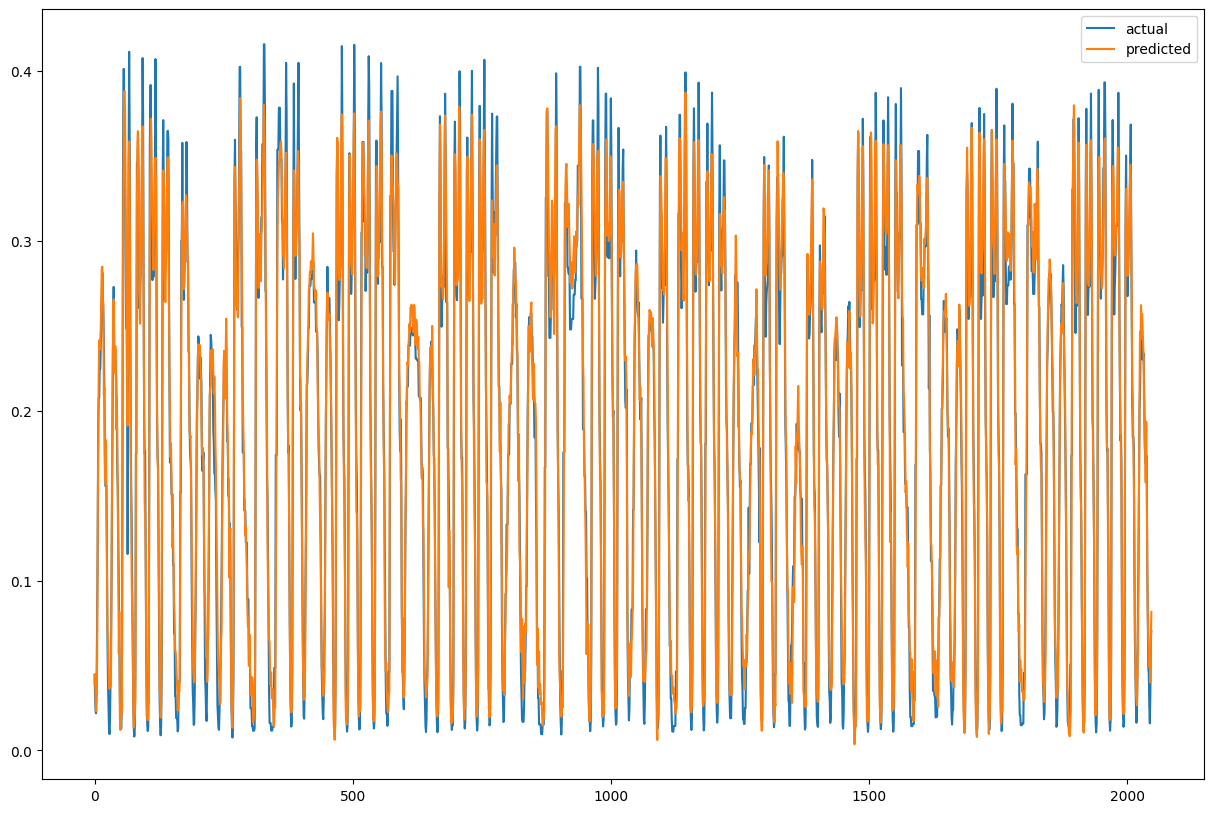

In [35]:
pd.DataFrame({
    'actual':y_test,
    'predicted':RNN_y_pred.flatten()
}).plot(figsize=(15,10))

<Axes: >

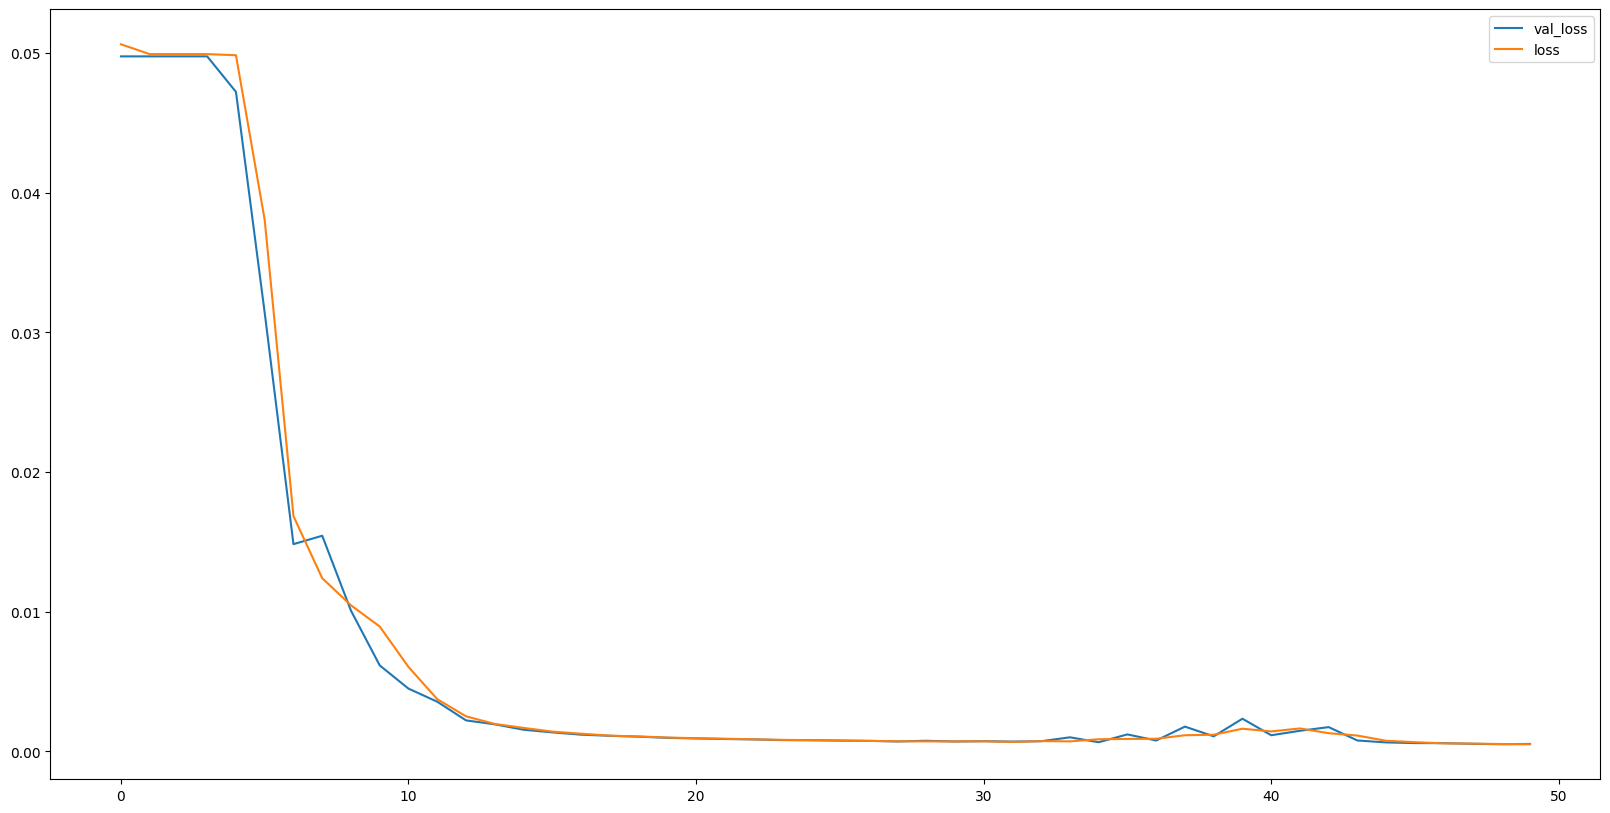

In [36]:
pd.DataFrame({
    'val_loss':RNN_hist['val_loss'],
    'loss':RNN_hist['loss']
}).plot(figsize=(20,10))

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [37]:
GRU_model = Sequential([
                        GRU(128, activation='tanh', return_sequences=True),
                        GRU(64, activation='tanh', return_sequences=True),
                        GRU(32, activation='tanh', return_sequences=False),
                        Dense(8, activation='relu'),
                        Dense(1, activation='relu')
])
GRU_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [39]:
GRU_history = GRU_model.fit(train_X_y, epochs=50, validation_data=val_X_y, callbacks=[early_stop, GRU_mc])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.0225 - mae: 0.1225 - val_loss: 0.0147 - val_mae: 0.1014
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.0148 - mae: 0.1051 - val_loss: 0.0147 - val_mae: 0.0972
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 931ms/step - loss: 0.0149 - mae: 0.0982 - val_loss: 0.0151 - val_mae: 0.1051
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0131 - mae: 0.0978 - val_loss: 0.0114 - val_mae: 0.0866
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 950ms/step - loss: 0.0115 - mae: 0.0863 - val_loss: 0.0099 - val_mae: 0.0850
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0094 - mae: 0.0807 - val_loss: 0.0081 - val_mae: 0.0758
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0070 - mae: 0.0700 - val_loss: 0.0061 - val_mae: 0.0621
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0051 - mae: 0.0561 - val_loss: 0.0044 - val_mae: 0.0514
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0036 - mae: 0.0468 - val_los

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [40]:
GRU_hist = pd.DataFrame(GRU_history.history)
GRU_hist.head()

GRU_y_pred = GRU_model.predict(X_test)
GRU_y_pred

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[0.19510768],
       [0.20122887],
       [0.2078787 ],
       ...,
       [0.1627351 ],
       [0.17215565],
       [0.17969128]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [41]:
print(f"MAE -> {mean_squared_error(y_test,GRU_y_pred)}")
print(f"MSE -> {mean_absolute_error(y_test,GRU_y_pred)}")
print(f"RMSE -> {np.sqrt(mean_squared_error(y_test,GRU_y_pred))}")
print(f"MAPE -> {mean_absolute_percentage_error(y_test,GRU_y_pred)}")

MAE -> 0.013041880003093429
MSE -> 0.0929885467834302
RMSE -> 0.1142010507968006
MAPE -> 2.254294272297911


<Axes: >

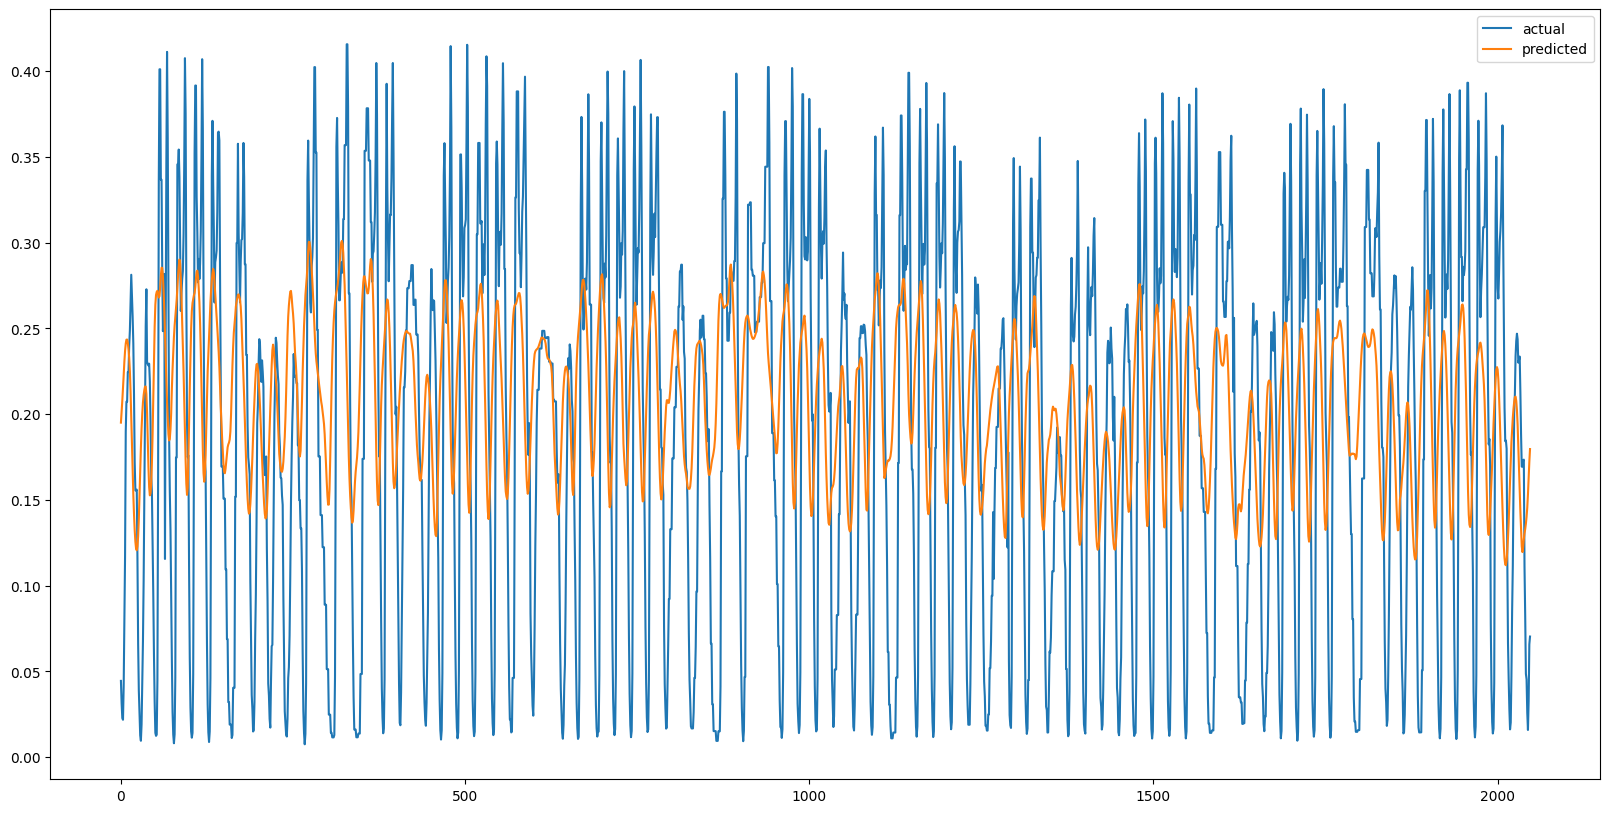

In [42]:
pd.DataFrame({
    'actual':y_test,
    'predicted':GRU_y_pred.flatten()
}).plot(figsize=(20,10))


<Axes: >

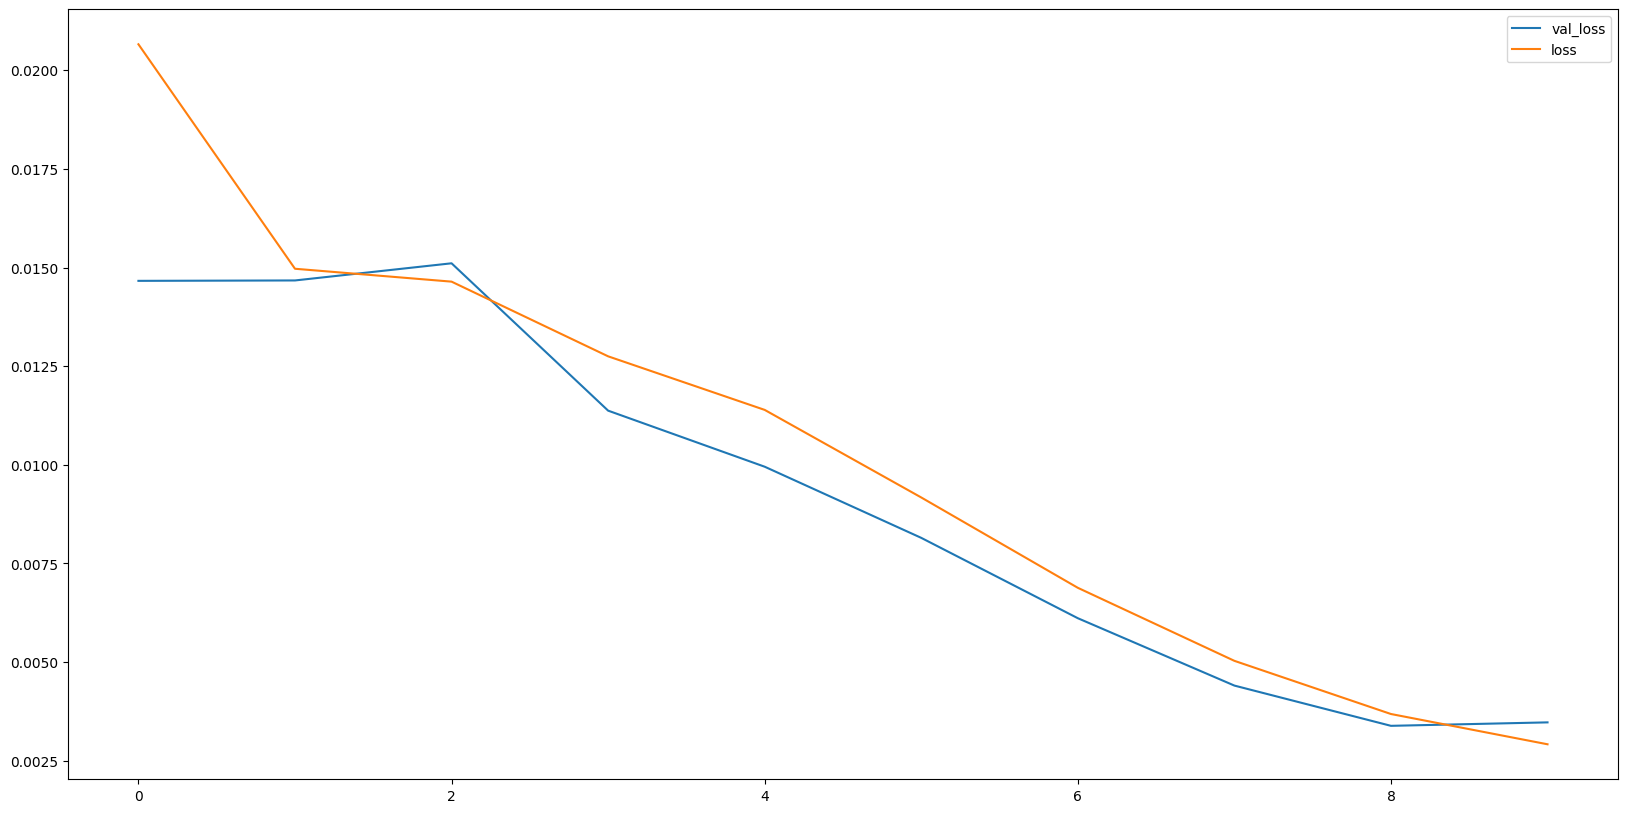

In [43]:
pd.DataFrame({
    'val_loss':GRU_hist['val_loss'],
    'loss':GRU_hist['loss']
}).plot(figsize=(20,10))

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
1. for handling missing value i used iterative imputer because it's best imputer for the related data and because there's no huge missing about data
2. for feature engineering i got the columns(prev_traffic_volume,diff_traffic_volume,day_of_the_week,month,day_of_the_year)
for prev_traffic_volume it helps the model to know about the current traffic volume and the previous, and diff_traffic_volume the difference between the current and previous those hugely helped for training the model as we can see in the grapths
3. for the model layers i started from simple model (try,test) and i started adding layers+neurons to make the model line fits in the right way
4. for batch_size i used 2048, i tried lower batch and tried 4096 but the lowest loss was when i used 2048 and because of course of the shape of the training 3200
5. for the loss function used mse because im working with regression not classification and for the evaluation metrics MSE, MAE, RMSE, MAPE, it helps me to know the performance of the model and what the losses are

6. when the model didn't learn and it shows undefitting i added more neurons and layers for RNN model and it start learn

7. i think there's overfitting for the RNN model i could use regularization techniques like Dropna or batchnormalization , and for underfitting when i run the model with a simple structure it gives me a underfitting i just added more layers and neurons and it started to learn-fit

8. as for future improvement i could add more features or use other models like Arima, LSTM or more complex model that we didn't take in the bootcamp like Fbprophet those take in mind other features and it could give a better performance
